#Reading data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
stores=pd.read_csv('drive/My Drive/walmart/stores.csv')
features=pd.read_csv('drive/My Drive/walmart/features.csv')
train=pd.read_csv('drive/My Drive/walmart/train.csv')

In [26]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [27]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [28]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [29]:
print(train.shape)
print(features.shape)
print(stores.shape)

(421570, 5)
(8190, 12)
(45, 3)


In [30]:
df = train.merge(stores, how='left').merge(features, how='left')
print(df.shape)
df.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


Final data after Joining the three tables

##Exploratory Data Analysis

####Checking for Missing values

In [31]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [32]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
#print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

MarkDown1 0.6426  % missing values
MarkDown2 0.7361  % missing values
MarkDown3 0.6748  % missing values
MarkDown4 0.6798  % missing values
MarkDown5 0.6408  % missing values


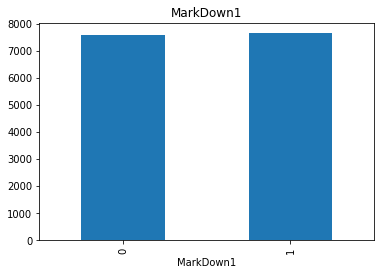

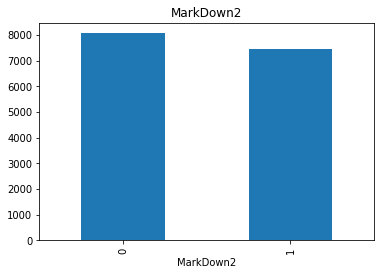

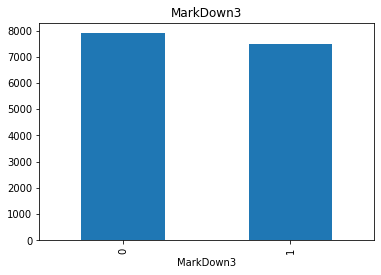

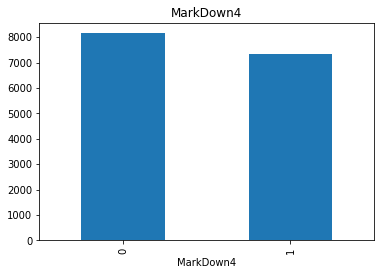

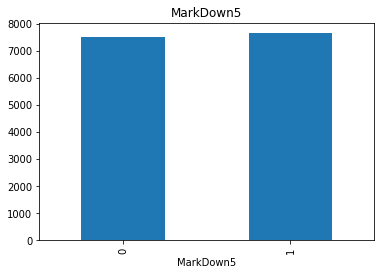

In [33]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Weekly_Sales where the information is missing or present
    data.groupby(feature)['Weekly_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()

As we can see that Missing values has some relation with Weekly Sales price so we have to impute the missing values carefully.

In [34]:

# list of numerical variables
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O') and (df[feature].dtypes != 'bool')]

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  13


,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,46039.49,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,41595.55,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,19403.54,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,21827.90,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [35]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [36]:
## Numerical variables are usually of 2 type
#1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if (df[feature].dtypes == 'int') ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 3


In [37]:
discrete_feature

['Store', 'Dept', 'Size']

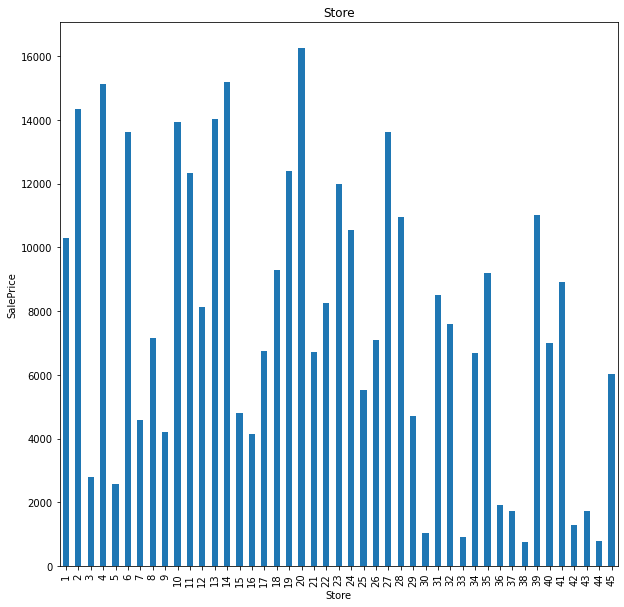

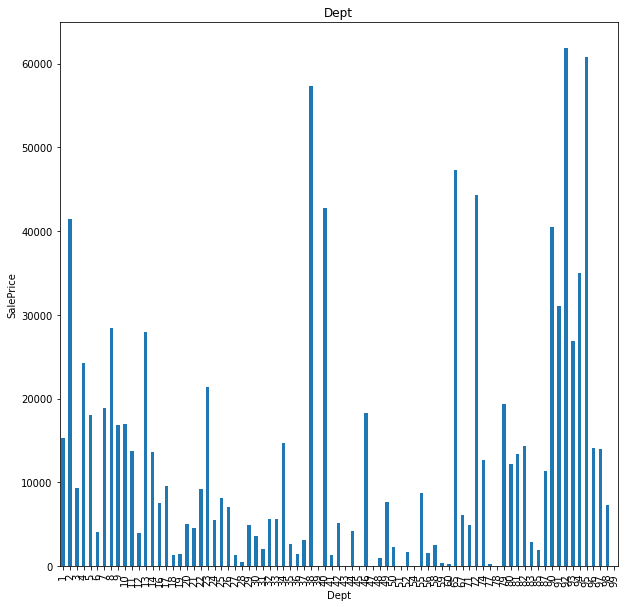

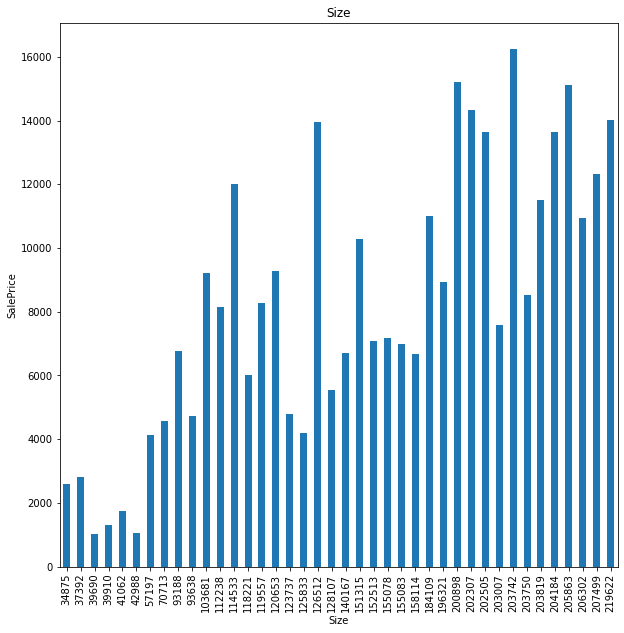

In [38]:
## Lets Find the realtionship between them and Weekly_Sales Price

for feature in discrete_feature:
    plt.figure(figsize=(10,10))

    data=df.copy()
    data.groupby(feature)['Weekly_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [39]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 10


In [40]:
df['Size'].unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221])

In [41]:
# df.groupby('Store')['Size'].median().plot.bar()
len(df['Store'].value_counts())
len(df['Dept'].value_counts())

81

In [42]:
df[continuous_feature].head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


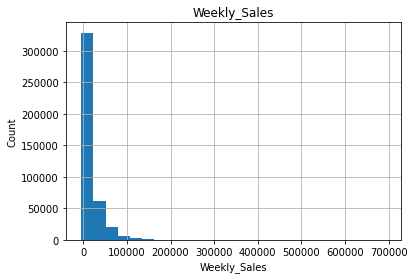

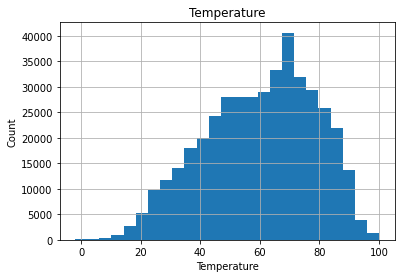

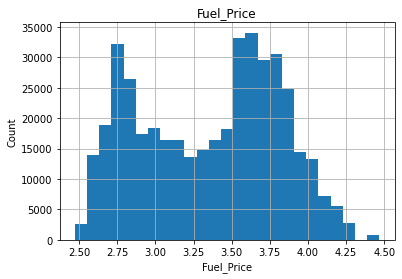

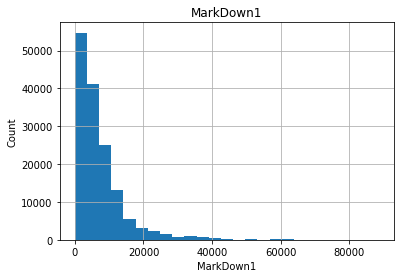

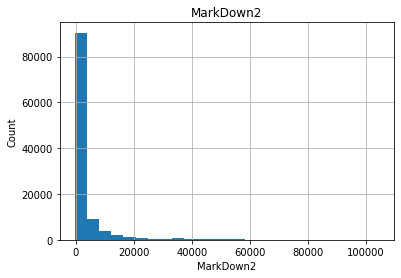

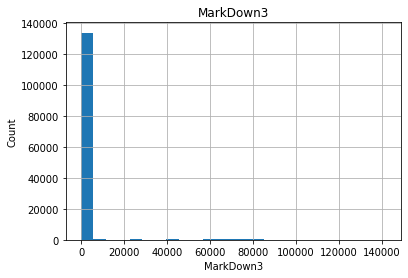

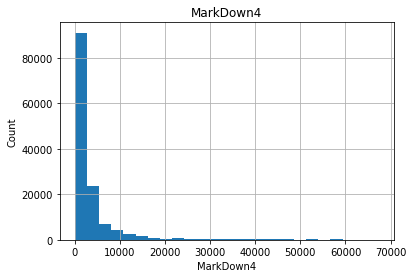

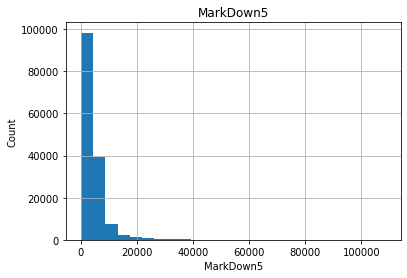

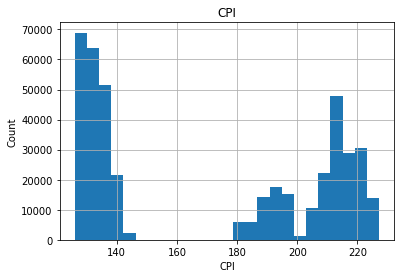

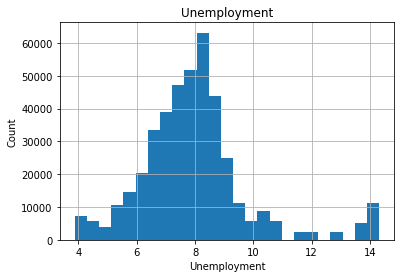

In [43]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


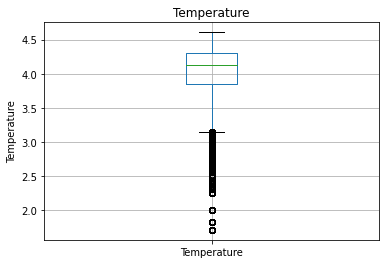

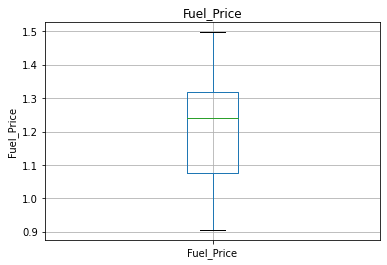

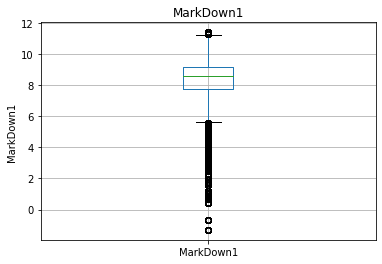

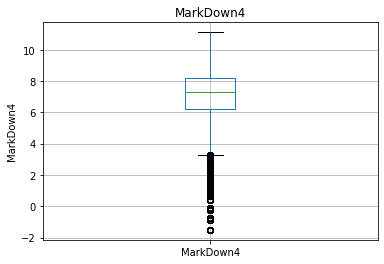

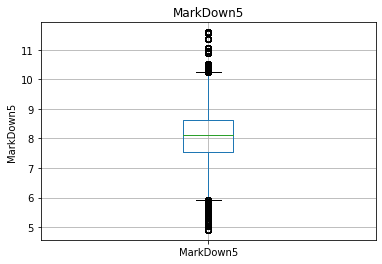

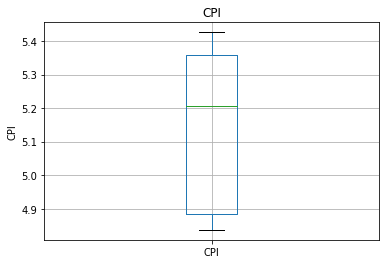

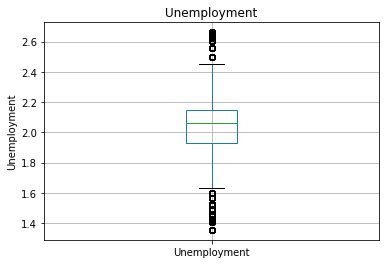

In [44]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

As we can see there are many Outliers present in the continous features.

In [45]:
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O') or  (df[feature].dtypes=='bool') if feature not in 'Date']
categorical_features

['IsHoliday', 'Type']

In [46]:
df[categorical_features].head()

,IsHoliday,Type
0,False,A
1,True,A
2,False,A
3,False,A
4,False,A


In [47]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is IsHoliday and number of categories are 2
The feature is Type and number of categories are 3


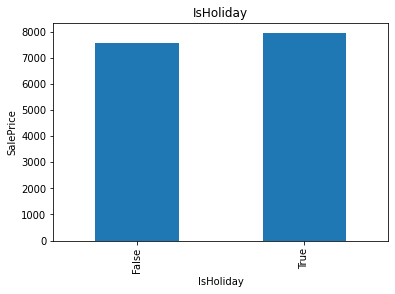

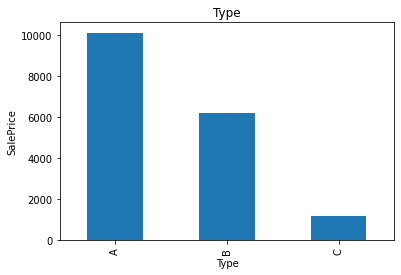

In [48]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Weekly_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Now lets explore the date feature

In [49]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day


df['year'].value_counts()

2011    153453
2010    140679
2012    127438
Name: year, dtype: int64

Text(0.5, 1.0, 'Weekly_Sales vs Year')

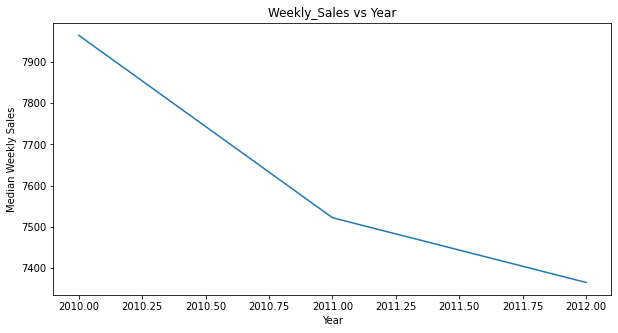

In [50]:
plt.figure(figsize=(10,5))

df.groupby(df['year'])['Weekly_Sales'].median().plot()

plt.xlabel('Year')
plt.ylabel('Median Weekly Sales')
plt.title("Weekly_Sales vs Year")


From this graph we can see as we go on from year 2010 to 2012, there is a decrease in the Weekly sales

Text(0.5, 1.0, 'Weekly_Sales vs Months')

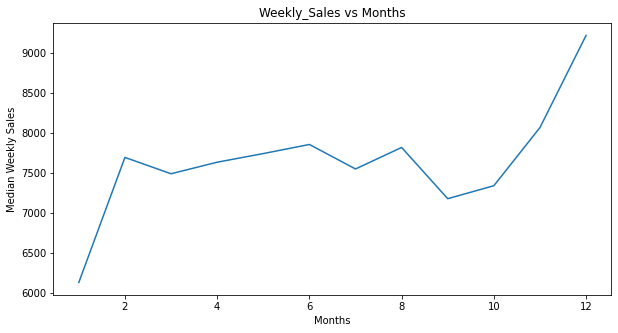

In [51]:
plt.figure(figsize=(10,5))

df.groupby(df['month'])['Weekly_Sales'].median().plot()

plt.xlabel('Months')
plt.ylabel('Median Weekly Sales')
plt.title("Weekly_Sales vs Months")


As we can observe that the Weekly Sales is high in the month of November and December

Text(0.5, 1.0, 'Weekly_Sales vs Days')

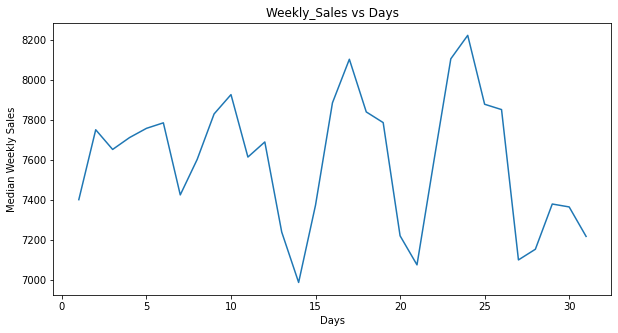

In [52]:
plt.figure(figsize=(10,5))

df.groupby(df['day'])['Weekly_Sales'].median().plot()

plt.xlabel('Days')
plt.ylabel('Median Weekly Sales')
plt.title("Weekly_Sales vs Days")


In [53]:
for feature in features_with_na:
  df[feature].fillna(df[feature].median(),inplace=True)

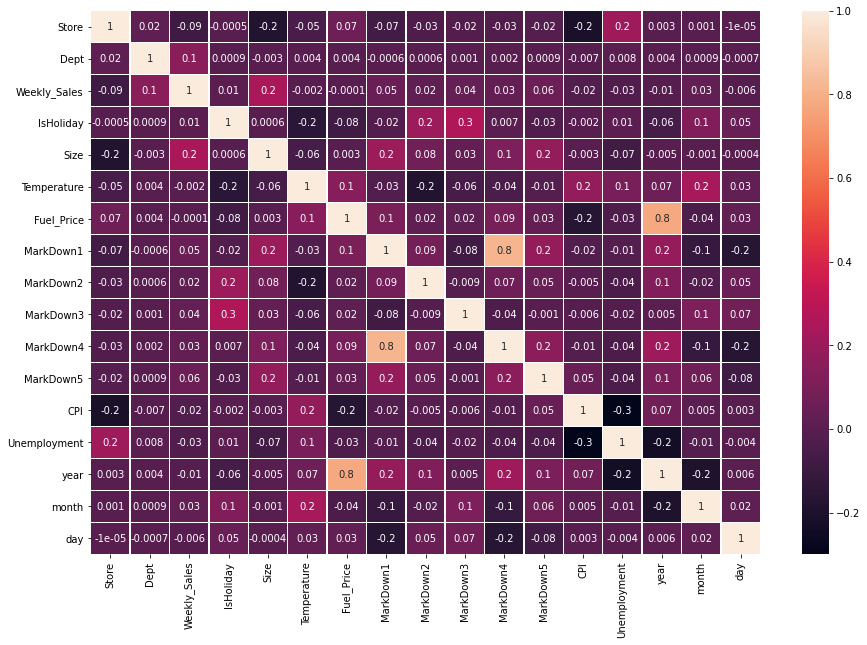

In [54]:
# sns.heatmap(df.corr(), annot = True,)
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax,fmt='.1g')

In [55]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.070700,-0.032997,-0.020293,-0.027762,-0.015393,-0.211088,0.208552,0.002997,0.001011,-0.000015
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.000587,0.000564,0.001468,0.002169,0.000896,-0.007477,0.007837,0.003738,0.000904,-0.000678
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.052739,0.020342,0.038524,0.033820,0.055702,-0.020921,-0.025864,-0.010111,0.028409,-0.006187
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.017418,0.207562,0.266464,0.006756,-0.029169,-0.001944,0.010460,-0.056746,0.123376,0.045465
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.203202,0.077080,0.033534,0.112056,0.179588,-0.003314,-0.068238,-0.004975,-0.001210,-0.000386
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.025144,-0.179142,-0.055968,-0.044688,-0.011890,0.182112,0.096730,0.065814,0.235983,0.026832
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.110255,0.023717,0.017681,0.092716,0.033922,-0.164210,-0.033853,0.779633,-0.040876,0.028058
MarkDown1,-0.070700,-0.000587,0.052739,-0.017418,0.203202,-0.025144,0.110255,1.000000,0.088357,-0.075525,0.816148,0.186165,-0.021389,-0.012874,0.185703,-0.108817,-0.165252
MarkDown2,-0.032997,0.000564,0.020342,0.207562,0.077080,-0.179142,0.023717,0.088357,1.000000,-0.008702,0.069051,0.047080,-0.004514,-0.038676,0.121806,-0.018499,0.051041
MarkDown3,-0.020293,0.001468,0.038524,0.266464,0.033534,-0.055968,0.017681,-0.075525,-0.008702,1.000000,-0.035481,-0.001381,-0.005974,-0.017658,0.005224,0.116010,0.072233


##Feature Engineering 

In [57]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [58]:
data=df.copy()
y=data['Weekly_Sales']
data.drop(['Weekly_Sales','Date'],axis=1,inplace=True)

In [61]:
data.isnull().sum()

Store           0
Dept            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [139]:
data.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1,1,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,2010,2,5,1,0,1,0,0
1,1,1,151315,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,2010,2,12,0,1,1,0,0
2,1,1,151315,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,2010,2,19,1,0,1,0,0
3,1,1,151315,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,2010,2,26,1,0,1,0,0
4,1,1,151315,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,2010,3,5,1,0,1,0,0


In [64]:

data=pd.get_dummies(data, columns = categorical_features)
data

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1,1,151315,42.31,2.572,5347.45,192.00,24.60,1481.31,3359.45,211.096358,8.106,2010,2,5,1,0,1,0,0
1,1,1,151315,38.51,2.548,5347.45,192.00,24.60,1481.31,3359.45,211.242170,8.106,2010,2,12,0,1,1,0,0
2,1,1,151315,39.93,2.514,5347.45,192.00,24.60,1481.31,3359.45,211.289143,8.106,2010,2,19,1,0,1,0,0
3,1,1,151315,46.63,2.561,5347.45,192.00,24.60,1481.31,3359.45,211.319643,8.106,2010,2,26,1,0,1,0,0
4,1,1,151315,46.50,2.625,5347.45,192.00,24.60,1481.31,3359.45,211.350143,8.106,2010,3,5,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28,1,0,0,1,0
421566,45,98,118221,64.89,3.985,5046.74,192.00,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5,1,0,0,1,0
421567,45,98,118221,54.47,4.000,1956.28,192.00,7.89,599.32,3990.54,192.327265,8.667,2012,10,12,1,0,0,1,0
421568,45,98,118221,56.47,3.969,2004.02,192.00,3.18,437.73,1537.49,192.330854,8.667,2012,10,19,1,0,0,1,0


Since features are at different scale, so feature needs to be performed.

In [66]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(data.values)
scaled_features

array([[-1.65819926, -1.41874236,  0.23920895, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       [-1.65819926, -1.41874236,  0.23920895, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       [-1.65819926, -1.41874236,  0.23920895, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       ...,
       [ 1.78325781,  1.76241805, -0.30348902, ..., -1.02251786,
         1.25637918, -0.3352628 ],
       [ 1.78325781,  1.76241805, -0.30348902, ..., -1.02251786,
         1.25637918, -0.3352628 ],
       [ 1.78325781,  1.76241805, -0.30348902, ..., -1.02251786,
         1.25637918, -0.3352628 ]])

In [67]:
scaled_features_df = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
scaled_features_df

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,-1.658199,-1.418742,0.239209,-0.963798,-1.720834,-0.134678,-0.163871,-0.083237,-0.165943,-0.125789,1.018774,0.078201,-1.215487,-1.371945,-1.219293,0.275106,-0.275106,0.977978,-0.795938,-0.335263
1,-1.658199,-1.418742,0.239209,-1.169783,-1.773177,-0.134678,-0.163871,-0.083237,-0.165943,-0.125789,1.022498,0.078201,-1.215487,-1.371945,-0.419617,-3.634961,3.634961,0.977978,-0.795938,-0.335263
2,-1.658199,-1.418742,0.239209,-1.092810,-1.847330,-0.134678,-0.163871,-0.083237,-0.165943,-0.125789,1.023697,0.078201,-1.215487,-1.371945,0.380060,0.275106,-0.275106,0.977978,-0.795938,-0.335263
3,-1.658199,-1.418742,0.239209,-0.729625,-1.744825,-0.134678,-0.163871,-0.083237,-0.165943,-0.125789,1.024476,0.078201,-1.215487,-1.371945,1.179736,0.275106,-0.275106,0.977978,-0.795938,-0.335263
4,-1.658199,-1.418742,0.239209,-0.736672,-1.605243,-0.134678,-0.163871,-0.083237,-0.165943,-0.125789,1.025255,0.078201,-1.215487,-1.063609,-1.219293,0.275106,-0.275106,0.977978,-0.795938,-0.335263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.783258,1.762418,-0.303489,0.259647,1.387032,-0.291598,-0.197732,-0.087416,-0.133321,-0.145429,0.531461,0.388404,1.294317,0.786408,1.408215,0.275106,-0.275106,-1.022518,1.256379,-0.335263
421566,1.783258,1.762418,-0.303489,0.260189,1.360860,-0.194345,-0.163871,-0.084282,0.044487,-0.406989,0.535467,0.379281,1.294317,1.094744,-1.219293,0.275106,-0.275106,-1.022518,1.256379,-0.335263
421567,1.783258,1.762418,-0.303489,-0.304645,1.393575,-0.807561,-0.163871,-0.086260,-0.406317,0.048289,0.539472,0.379281,1.294317,1.094744,-0.419617,0.275106,-0.275106,-1.022518,1.256379,-0.335263
421568,1.783258,1.762418,-0.303489,-0.196231,1.325965,-0.798088,-0.163871,-0.087112,-0.450356,-0.628354,0.539564,0.379281,1.294317,1.094744,0.380060,0.275106,-0.275106,-1.022518,1.256379,-0.335263


In [68]:
data.isnull().sum()

Store              0
Dept               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
year               0
month              0
day                0
IsHoliday_False    0
IsHoliday_True     0
Type_A             0
Type_B             0
Type_C             0
dtype: int64

##Feature Selection

In [69]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features_df,y,test_size=0.1,random_state=0)

In [71]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [72]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
    # np.sum(sel_.estimator_.coef_ == 0)))

total features: 20
selected features: 19


In [73]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]


##Model Selection

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(("LR",LinearRegression()))
models.append(("XGB",xgb.XGBRegressor()))
models.append(("RF",RandomForestRegressor()))

for name,model in models:
  print("Model Name:",name)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  print('R2 Score:',r2_score(pred,y_test))
  print('Mean Absolute Error:',mean_absolute_error(pred,y_test))
  print(('-')*50)


# lr=LinearRegression()
# lr.fit(X_train,y_train)

Model Name: LR
R2 Score: -8.833231983905861
Mean Absolute Error: 14581.569403402156
--------------------------------------------------
Model Name: XGB
[18:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.547230720835516
Mean Absolute Error: 6857.986236785051
--------------------------------------------------
Model Name: RF
R2 Score: 0.9774728796332305
Mean Absolute Error: 1358.6386717057665
--------------------------------------------------


From this we can see that Random Forest Regressor gives the better R2 error and Mean Absolute error.

So we will use Random Forest regressor on Test data

In [91]:
test=pd.read_csv('drive/My Drive/walmart/test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [92]:
test_df = test.merge(stores, how='left').merge(features, how='left')
print(test_df.shape)
test_df.head()

(115064, 15)


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [93]:
test_df.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [100]:
test_df['Unemployment'].fillna(test_df['Unemployment'].median(),inplace=True)
test_df['CPI'].fillna(test_df['CPI'].median(),inplace=True)
test_df['MarkDown1'].fillna(test_df['MarkDown1'].median(),inplace=True)
test_df['MarkDown2'].fillna(test_df['MarkDown2'].median(),inplace=True)
test_df['MarkDown3'].fillna(test_df['MarkDown3'].median(),inplace=True)
test_df['MarkDown4'].fillna(test_df['MarkDown4'].median(),inplace=True)
test_df['MarkDown5'].fillna(test_df['MarkDown5'].median(),inplace=True)

In [101]:
test_df.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [103]:
test_df['year']=pd.DatetimeIndex(test_df['Date']).year
test_df['month']=pd.DatetimeIndex(test_df['Date']).month
test_df['day']=pd.DatetimeIndex(test_df['Date']).day




In [104]:
categorical_features=[feature for feature in test_df.columns if (test_df[feature].dtypes=='O') or  (test_df[feature].dtypes=='bool') if feature not in 'Date']
categorical_features

['IsHoliday', 'Type']

In [ ]:
  # for feature in categorical_features:
  # data[feature]=pd.get_dummies(feature)
test_df=pd.get_dummies(test_df, columns = categorical_features)
test_df

In [109]:
data.columns

Index(['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'year', 'month', 'day', 'IsHoliday_False',
       'IsHoliday_True', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [113]:
scaled_features

array([[-1.65819926, -1.41874236,  0.23920895, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       [-1.65819926, -1.41874236,  0.23920895, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       [-1.65819926, -1.41874236,  0.23920895, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       ...,
       [ 1.78325781,  1.76241805, -0.30348902, ..., -1.02251786,
         1.25637918, -0.3352628 ],
       [ 1.78325781,  1.76241805, -0.30348902, ..., -1.02251786,
         1.25637918, -0.3352628 ],
       [ 1.78325781,  1.76241805, -0.30348902, ..., -1.02251786,
         1.25637918, -0.3352628 ]])

In [126]:
test_df=test_df[selected_feat]

In [128]:
test_scaled_features = StandardScaler().fit_transform(test_df.values)
test_scaled_features_df = pd.DataFrame(test_scaled_features, index=test_df.index, columns=test_df.columns)
test_scaled_features_df

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,IsHoliday_False,Type_A,Type_B,Type_C
0,-1.657956,-1.413724,0.242483,0.073606,-0.816679,-0.085958,0.294428,-0.163371,0.078771,-0.060954,1.201083,-0.212329,-1.815267,1.467878,-1.535754,0.290032,0.979679,-0.794124,-0.338852
1,-1.657956,-1.413724,0.242483,0.389776,-1.117379,0.349392,0.051997,-0.164171,0.219048,0.114758,1.201620,-0.212329,-1.815267,1.467878,-0.744335,0.290032,0.979679,-0.794124,-0.338852
2,-1.657956,-1.413724,0.242483,-0.054572,-1.376316,0.188056,-0.368080,-0.159354,-0.270462,0.138339,1.202537,-0.212329,-1.815267,1.467878,0.047085,0.290032,0.979679,-0.794124,-0.338852
3,-1.657956,-1.413724,0.242483,0.122206,-1.547548,-0.636155,-0.407365,5.515231,-0.399085,-0.186133,1.203959,-0.212329,-1.815267,1.467878,0.838505,-3.447897,0.979679,-0.794124,-0.338852
4,-1.657956,-1.413724,0.242483,-0.085548,-1.564254,-0.488717,-0.306614,0.123939,-0.407352,0.156526,1.205381,-0.212329,-1.815267,1.467878,1.629925,0.290032,0.979679,-0.794124,-0.338852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.750391,-0.299095,1.180737,0.239949,-0.265915,-0.274899,-0.166999,-0.087006,-0.038724,0.297406,-0.032381,0.550883,0.075243,1.403805,0.290032,-1.020743,1.259249,-0.338852
115060,1.776894,1.750391,-0.299095,1.258177,0.135539,0.131399,-0.098405,-0.123021,0.379358,-0.123823,0.297406,-0.032381,0.550883,0.353770,-1.196574,0.290032,-1.020743,1.259249,-0.338852
115061,1.776894,1.750391,-0.299095,1.358048,0.135539,-0.364337,-0.158612,-0.160724,-0.324560,-0.091145,0.297406,-0.032381,0.550883,0.353770,-0.405155,0.290032,-1.020743,1.259249,-0.338852
115062,1.776894,1.750391,-0.299095,1.543371,0.649236,-0.441818,-0.265070,-0.151737,-0.377757,-0.147247,0.297406,-0.032381,0.550883,0.353770,0.386265,0.290032,-1.020743,1.259249,-0.338852


In [133]:
final_prediction=model.predict(test_scaled_features_df)

In [134]:
final_prediction

array([27085.9744, 23137.5244, 21138.542 , ...,   322.6858,   302.0469,
         321.3392])

In [135]:
dataset_test=pd.DataFrame()

In [136]:
dataset_test['weeklySales'] = final_prediction
dataset_test['Date'] = test['Date']
dataset_test['id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test['Date'].astype(str)
dataset_test = dataset_test[['id', 'weeklySales']]
dataset_test = dataset_test.rename(columns={'id': 'Id', 'weeklySales': 'Weekly_Sales'})

In [137]:
dataset_test

,Id,Weekly_Sales
0,1_1_2012-11-02,27085.9744
1,1_1_2012-11-09,23137.5244
2,1_1_2012-11-16,21138.5420
3,1_1_2012-11-23,23516.7908
4,1_1_2012-11-30,33390.7328
...,...,...
115059,45_98_2013-06-28,314.0070
115060,45_98_2013-07-05,353.8625
115061,45_98_2013-07-12,322.6858
115062,45_98_2013-07-19,302.0469


dataset_test.to_csv('output.csv', index=False)